<a href="https://colab.research.google.com/github/iCristian/AMA316/blob/master/datos_encuestas_28_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuraciones opcionales para mejor visualización
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None) # Para ver todas las columnas

In [30]:
# Carga del archivo Excel
file_path = 'datos_encuesta.xlsx'
df = pd.read_excel(file_path)

In [31]:
# Ver las primeras filas
print("Primeras filas del DataFrame:")
print(df.head())

# Obtener información general (tipos de datos, no nulos)
print("\nInformación del DataFrame:")
df.info()

# Obtener dimensiones (filas, columnas)
print(f"\nDimensiones del DataFrame: {df.shape}")

# Resumen estadístico inicial (para columnas numéricas)
print("\nResumen estadístico inicial:")
print(df.describe())

# Contar valores perdidos por columna
print("\nValores perdidos por columna:")
print(df.isnull().sum())

Primeras filas del DataFrame:
   Id      Fecha Cuestionario N_parto_cronologico Tipo_parto Responsable  \
0   1 2025-01-19            C                  P1    Cesarea          AF   
1   2 2025-01-12            C                  P2      Parto          AF   
2   3 2025-01-12            C                  P3    Cesarea          JG   
3   4 2025-01-12            C                  P1      Parto          JG   
4   5 2025-01-13            C                  P1      Parto          JG   

   Edad  Nivel_educacional Paridad  Codificación  Item_1 Item_2  Item_3  \
0    27   Técnico Superior       M  190125CP1CAF       5      5       1   
1    31  Superior Completa       P  120125CP2PAF       5      5       1   
2    21   Media Incompleta       M  120125CP3CJG       4      4       2   
3    29     Media Completa       M  120125CP1PJG       5      5       5   
4    22     Media Completa       P  130125CP1PJG       5      5       2   

   Item_4  Item_5  Item_6  Item_7  Item_8  Item_9  Item_10  It

In [34]:
# Lista de columnas de ítems
item_cols = [f'Item_{i}' for i in range(1, 48)]

# Imputar NaN en columnas de ítems con la mediana de cada columna
for col in item_cols:
    # Convert the column to numeric, handling errors by setting them to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"NaN en '{col}' imputados con mediana: {median_val}")

# Considerar eliminar filas con datos demográficos clave faltantes o demasiados ítems faltantes
# df.dropna(subset=['Tipo_parto', 'Edad', ...], inplace=True) # Ejemplo si decides eliminar
# O manejar casos específicos como la fila 10 (Tipo_parto)
print("\nValores perdidos después de imputación inicial:")
print(df.isnull().sum())
# Revisa si aún quedan NaN y decide cómo manejarlos (ej. eliminar filas específicas)
df.dropna(subset=['Tipo_parto'], inplace=True) # Eliminar fila 10 por Tipo_parto NaN

NaN en 'Item_2' imputados con mediana: 5.0
NaN en 'Item_11' imputados con mediana: 5.0
NaN en 'Item_12' imputados con mediana: 5.0
NaN en 'Item_13' imputados con mediana: 5.0
NaN en 'Item_14' imputados con mediana: 5.0
NaN en 'Item_15' imputados con mediana: 5.0
NaN en 'Item_16' imputados con mediana: 5.0
NaN en 'Item_17' imputados con mediana: 5.0
NaN en 'Item_18' imputados con mediana: 5.0
NaN en 'Item_19' imputados con mediana: 5.0
NaN en 'Item_20' imputados con mediana: 5.0
NaN en 'Item_21' imputados con mediana: 5.0
NaN en 'Item_22' imputados con mediana: 5.0
NaN en 'Item_23' imputados con mediana: 5.0
NaN en 'Item_24' imputados con mediana: 5.0
NaN en 'Item_25' imputados con mediana: 5.0
NaN en 'Item_26' imputados con mediana: 5.0
NaN en 'Item_27' imputados con mediana: 5.0
NaN en 'Item_28' imputados con mediana: 5.0
NaN en 'Item_29' imputados con mediana: 5.0
NaN en 'Item_30' imputados con mediana: 5.0
NaN en 'Item_31' imputados con mediana: 5.0
NaN en 'Item_32' imputados con me

<ipython-input-34-c8e2811f8a0a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [35]:
# Convertir columnas de ítems a numérico (si no lo son ya)
for col in item_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' convierte errores en NaN

# Convertir Edad a numérico
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

# Verificar de nuevo los tipos y NaN si 'coerce' generó alguno
df.info()
print("\nValores perdidos después de conversión de tipos:")
print(df.isnull().sum())
# Manejar cualquier nuevo NaN si es necesario

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 167
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   167 non-null    int64         
 1   Fecha                167 non-null    datetime64[ns]
 2   Cuestionario         167 non-null    object        
 3   N_parto_cronologico  167 non-null    object        
 4   Tipo_parto           167 non-null    object        
 5   Responsable          167 non-null    object        
 6   Edad                 167 non-null    int64         
 7   Nivel_educacional    167 non-null    object        
 8   Paridad              167 non-null    object        
 9   Codificación         167 non-null    object        
 10  Item_1               167 non-null    int64         
 11  Item_2               167 non-null    float64       
 12  Item_3               167 non-null    int64         
 13  Item_4               167 non-null    int

In [36]:
# Ver valores únicos actuales
print("\nNiveles educacionales únicos (antes):")
print(df['Nivel_educacional'].unique())

# Mapeo (ajusta según tus categorías deseadas)
edu_map = {
    'Técnico Superior': 'Técnico',
    'TecSuperior': 'Técnico',
    'Tec Superior Incompleto': 'Técnico',
    'Superior Completa': 'Superior',
    'Superior Incompleta': 'Superior',
    'Media Completa': 'Media',
    'Media Incompleta': 'Media',
    'Básica Completa': 'Básica'
    # Añade otros si existen
}
df['Nivel_educacional_std'] = df['Nivel_educacional'].map(edu_map).fillna('Otro/Desconocido') # Crea nueva columna

print("\nNiveles educacionales únicos (después):")
print(df['Nivel_educacional_std'].value_counts())


Niveles educacionales únicos (antes):
['Técnico Superior' 'Superior Completa' 'Media Incompleta'
 'Media Completa' 'Superior Incompleta' 'Básica Completa'
 'Técnico Superior Incompleta' 'Universitaria Completa']

Niveles educacionales únicos (después):
Nivel_educacional_std
Media               78
Superior            51
Técnico             29
Básica               5
Otro/Desconocido     4
Name: count, dtype: int64


In [37]:
print("\nTipos de parto únicos (antes):")
print(df['Tipo_parto'].unique())

parto_map = {
    'Cesarea': 'Cesárea', # Estandarizar acento
    'Parto': 'Parto Vaginal',
    'Fórceps': 'Fórceps' # Ya parece estándar
    # Añade otros si existen
}
df['Tipo_parto_std'] = df['Tipo_parto'].map(parto_map).fillna('Otro/Desconocido')

print("\nTipos de parto únicos (después):")
print(df['Tipo_parto_std'].value_counts())


Tipos de parto únicos (antes):
['Cesarea' 'Parto' 'Forceps']

Tipos de parto únicos (después):
Tipo_parto_std
Parto Vaginal       101
Cesárea              65
Otro/Desconocido      1
Name: count, dtype: int64


In [39]:
# Lista de ítems a invertir
items_invertir = ['Item_3', 'Item_5', 'Item_32', 'Item_33', 'Item_35', 'Item_43']

# Aplicar inversión
for item in items_invertir:
    if item in df.columns:
        df[item + '_inv'] = 6 - df[item] # Crea nuevas columnas invertidas
        print(f"Ítem '{item}' invertido en columna '{item}_inv'.")
    else:
        print(f"Advertencia: Ítem '{item}' no encontrado para invertir.")

# Opcional: Reemplazar las columnas originales (¡cuidado!) o usar las nuevas '_inv' en análisis posteriores.
# Por seguridad, trabajaremos usando las columnas invertidas cuando sea necesario.

Ítem 'Item_3' invertido en columna 'Item_3_inv'.
Ítem 'Item_5' invertido en columna 'Item_5_inv'.
Ítem 'Item_32' invertido en columna 'Item_32_inv'.
Ítem 'Item_33' invertido en columna 'Item_33_inv'.
Ítem 'Item_35' invertido en columna 'Item_35_inv'.
Ítem 'Item_43' invertido en columna 'Item_43_inv'.



Distribución Nivel Educacional:
Nivel_educacional_std
Media               46.706587
Superior            30.538922
Técnico             17.365269
Básica               2.994012
Otro/Desconocido     2.395210
Name: proportion, dtype: float64


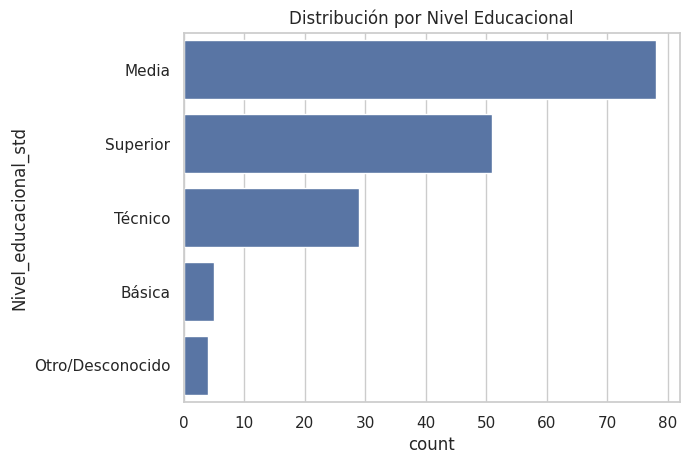


Distribución Paridad:
Paridad
M    52.694611
P    46.107784
C     1.197605
Name: proportion, dtype: float64


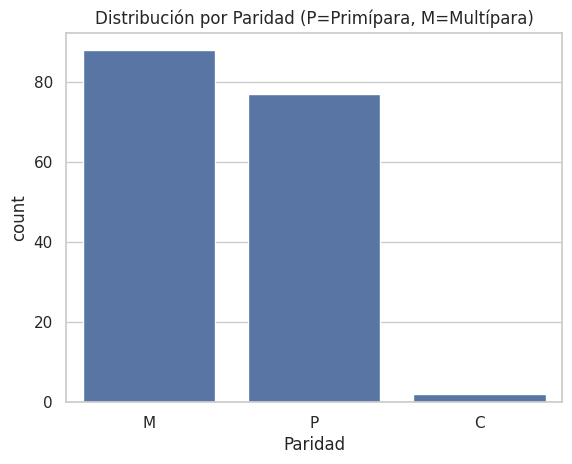


Distribución Tipo de Parto:
Tipo_parto_std
Parto Vaginal       60.479042
Cesárea             38.922156
Otro/Desconocido     0.598802
Name: proportion, dtype: float64


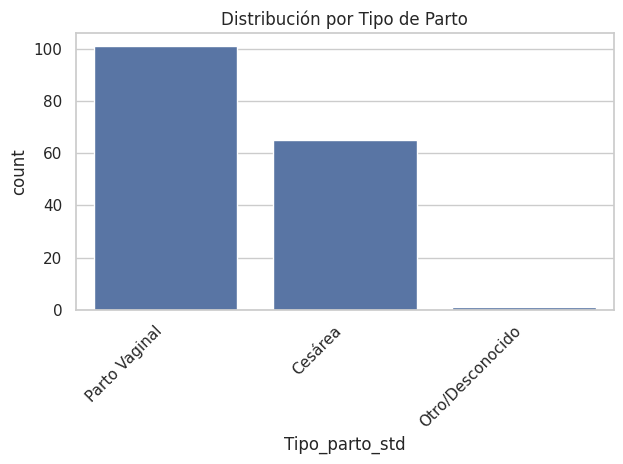

In [40]:
print("\nDistribución Nivel Educacional:")
print(df['Nivel_educacional_std'].value_counts(normalize=True) * 100)
sns.countplot(y='Nivel_educacional_std', data=df, order=df['Nivel_educacional_std'].value_counts().index)
plt.title('Distribución por Nivel Educacional')
plt.show()

print("\nDistribución Paridad:")
print(df['Paridad'].value_counts(normalize=True) * 100)
sns.countplot(x='Paridad', data=df, order=df['Paridad'].value_counts().index)
plt.title('Distribución por Paridad (P=Primípara, M=Multípara)')
plt.show()

print("\nDistribución Tipo de Parto:")
print(df['Tipo_parto_std'].value_counts(normalize=True) * 100)
sns.countplot(x='Tipo_parto_std', data=df, order=df['Tipo_parto_std'].value_counts().index)
plt.title('Distribución por Tipo de Parto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Estadísticas Descriptivas - Edad:
count    167.000000
mean      28.491018
std        5.885318
min       17.000000
25%       23.000000
50%       28.000000
75%       33.000000
max       43.000000
Name: Edad, dtype: float64


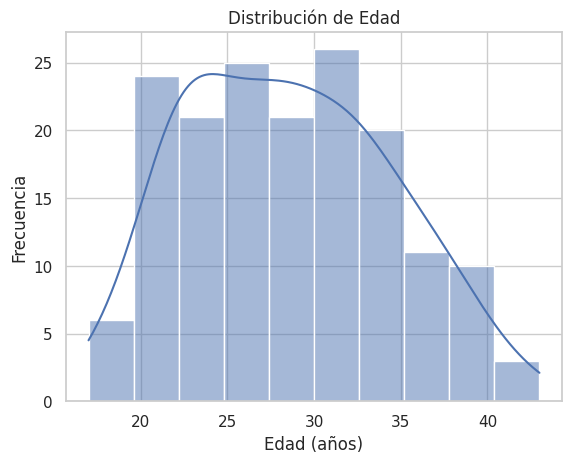

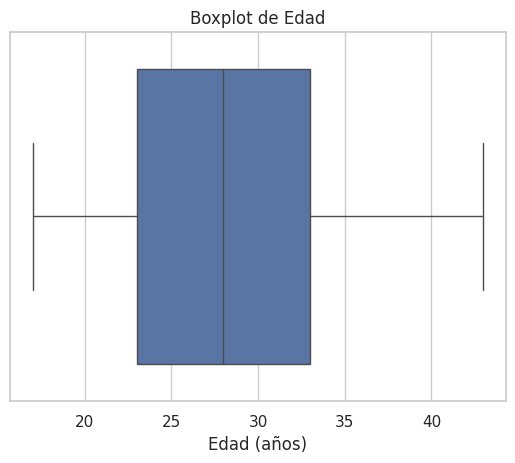

In [41]:
print("\nEstadísticas Descriptivas - Edad:")
print(df['Edad'].describe())

sns.histplot(df['Edad'], kde=True, bins=10)
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

sns.boxplot(x=df['Edad'])
plt.title('Boxplot de Edad')
plt.xlabel('Edad (años)')
plt.show()

In [42]:
# Crear un diccionario para acceder a las columnas correctas (originales o invertidas)
items_analisis = {}
for i in range(1, 48):
    item_orig = f'Item_{i}'
    item_inv = f'Item_{i}_inv'
    if item_inv in df.columns: # Si existe la versión invertida, úsala
        items_analisis[item_orig] = item_inv
    elif item_orig in df.columns: # Si no, usa la original
        items_analisis[item_orig] = item_orig
    # else: el ítem no existe

# Calcular descriptivos para cada ítem
desc_items = pd.DataFrame()
for item_key, col_name in items_analisis.items():
     desc_items[item_key] = df[col_name].describe()

print("\nResumen Descriptivo por Ítem (usando invertidos donde aplica):")
# Use '50%' instead of 'median' to access the median values
print(desc_items.T[['mean', '50%', 'std', 'min', 'max']].rename(columns={'50%': 'median'}))


Resumen Descriptivo por Ítem (usando invertidos donde aplica):
             mean  median       std  min  max
Item_1   4.880240     5.0  0.436337  2.0  5.0
Item_2   4.844311     5.0  0.559432  1.0  5.0
Item_3   4.011976     5.0  1.348752  1.0  5.0
Item_4   4.676647     5.0  0.730320  1.0  5.0
Item_5   4.538922     5.0  0.980217  1.0  5.0
Item_6   4.802395     5.0  0.632832  1.0  5.0
Item_7   4.520958     5.0  0.955884  1.0  5.0
Item_8   4.856287     5.0  0.494249  1.0  5.0
Item_9   4.742515     5.0  0.658257  1.0  5.0
Item_10  4.790419     5.0  0.619292  1.0  5.0
Item_11  4.820359     5.0  0.443227  3.0  5.0
Item_12  4.395210     5.0  1.129869  1.0  5.0
Item_13  4.724551     5.0  0.607827  2.0  5.0
Item_14  4.826347     5.0  0.537532  1.0  5.0
Item_15  4.832335     5.0  0.420165  3.0  5.0
Item_16  4.760479     5.0  0.632547  1.0  5.0
Item_17  4.850299     5.0  0.486303  1.0  5.0
Item_18  4.844311     5.0  0.410349  3.0  5.0
Item_19  4.820359     5.0  0.529894  1.0  5.0
Item_20  4.90419

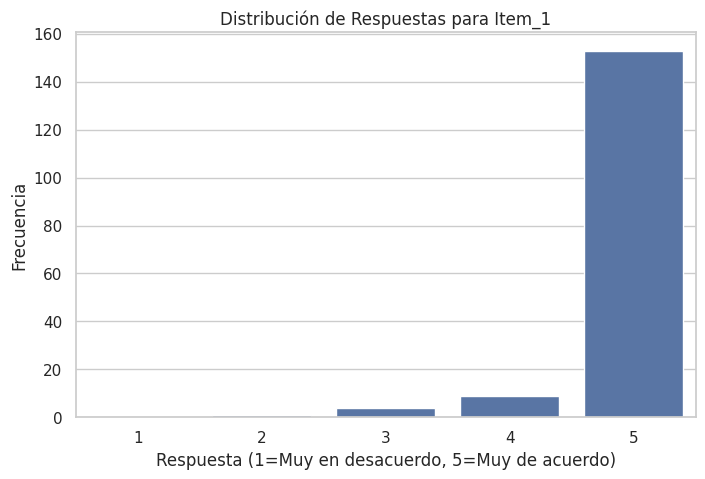

In [43]:
# Visualizar distribución de un ítem de ejemplo (ej. Item 1)
item_ejemplo = 'Item_1'
col_ejemplo = items_analisis[item_ejemplo]
plt.figure(figsize=(8, 5))
sns.countplot(x=df[col_ejemplo], order=[1, 2, 3, 4, 5]) # Asegura orden Likert
plt.title(f'Distribución de Respuestas para {item_ejemplo}')
plt.xlabel('Respuesta (1=Muy en desacuerdo, 5=Muy de acuerdo)')
plt.ylabel('Frecuencia')
plt.show()

## Análisis por Dimensiones

In [44]:
# Definir los ítems originales pertenecientes a cada dimensión
dimensiones = {
    'Cuidado_relacional_calidad': [1, 2, 6, 9, 10, 11, 14, 15, 20, 28, 39, 44, 47],
    'Cuidado_despersonalizado': [3, 5, 32, 33, 35, 43], # ¡Estos usan las columnas invertidas!
    'Participacion_familiar_continua': [4, 13, 25, 36],
    'Cuidado_oportuno_respetuoso': [7, 16, 17, 19, 21, 30],
    'Ambiente_fisico_confortable': [8, 18, 26, 27, 42],
    'Condiciones_contacto_madre_hijo': [22, 24, 45, 46],
    'Autocuidado_confort': [12, 23, 29, 31, 34, 37, 38, 40, 41]
}

# Crear un mapeo de ítem original a columna de análisis (original o _inv)
mapa_item_columna = {f'Item_{i}': items_analisis.get(f'Item_{i}') for i in range(1, 48)}

In [45]:
# Calcular la puntuación media para cada dimensión
for dim_nombre, items_lista in dimensiones.items():
    # Obtener los nombres de las columnas correctas (originales o invertidas)
    cols_dim = [mapa_item_columna.get(f'Item_{i}') for i in items_lista if mapa_item_columna.get(f'Item_{i}') is not None]
    if cols_dim: # Asegurarse de que hay columnas válidas para la dimensión
        df[f'Score_{dim_nombre}'] = df[cols_dim].mean(axis=1)
        print(f"Calculada puntuación media para dimensión: {dim_nombre}")
    else:
         print(f"Advertencia: No se encontraron columnas válidas para la dimensión {dim_nombre}")

# Ver las nuevas columnas de puntuación
print("\nDataFrame con puntuaciones de dimensión:")
print(df[[col for col in df.columns if col.startswith('Score_')]].head())

Calculada puntuación media para dimensión: Cuidado_relacional_calidad
Calculada puntuación media para dimensión: Cuidado_despersonalizado
Calculada puntuación media para dimensión: Participacion_familiar_continua
Calculada puntuación media para dimensión: Cuidado_oportuno_respetuoso
Calculada puntuación media para dimensión: Ambiente_fisico_confortable
Calculada puntuación media para dimensión: Condiciones_contacto_madre_hijo
Calculada puntuación media para dimensión: Autocuidado_confort

DataFrame con puntuaciones de dimensión:
   Score_Cuidado_relacional_calidad  Score_Cuidado_despersonalizado  \
0                          5.000000                        5.000000   
1                          5.000000                        5.000000   
2                          4.076923                        4.166667   
3                          5.000000                        4.333333   
4                          5.000000                        4.833333   

   Score_Participacion_familiar_contin


Resumen Descriptivo - Puntuaciones por Dimensión:
                                           mean    median       std       min  \
Score_Cuidado_relacional_calidad       4.827729  5.000000  0.373730  2.615385   
Score_Cuidado_despersonalizado         4.359281  4.666667  0.764852  1.500000   
Score_Participacion_familiar_continua  4.761976  5.000000  0.461474  2.500000   
Score_Cuidado_oportuno_respetuoso      4.745509  5.000000  0.424648  2.500000   
Score_Ambiente_fisico_confortable      4.797605  5.000000  0.349173  3.400000   
Score_Condiciones_contacto_madre_hijo  4.673653  5.000000  0.611580  1.750000   
Score_Autocuidado_confort              4.314704  4.555556  0.741921  1.000000   

                                       max  
Score_Cuidado_relacional_calidad       5.0  
Score_Cuidado_despersonalizado         5.0  
Score_Participacion_familiar_continua  5.0  
Score_Cuidado_oportuno_respetuoso      5.0  
Score_Ambiente_fisico_confortable      5.0  
Score_Condiciones_contacto_mad

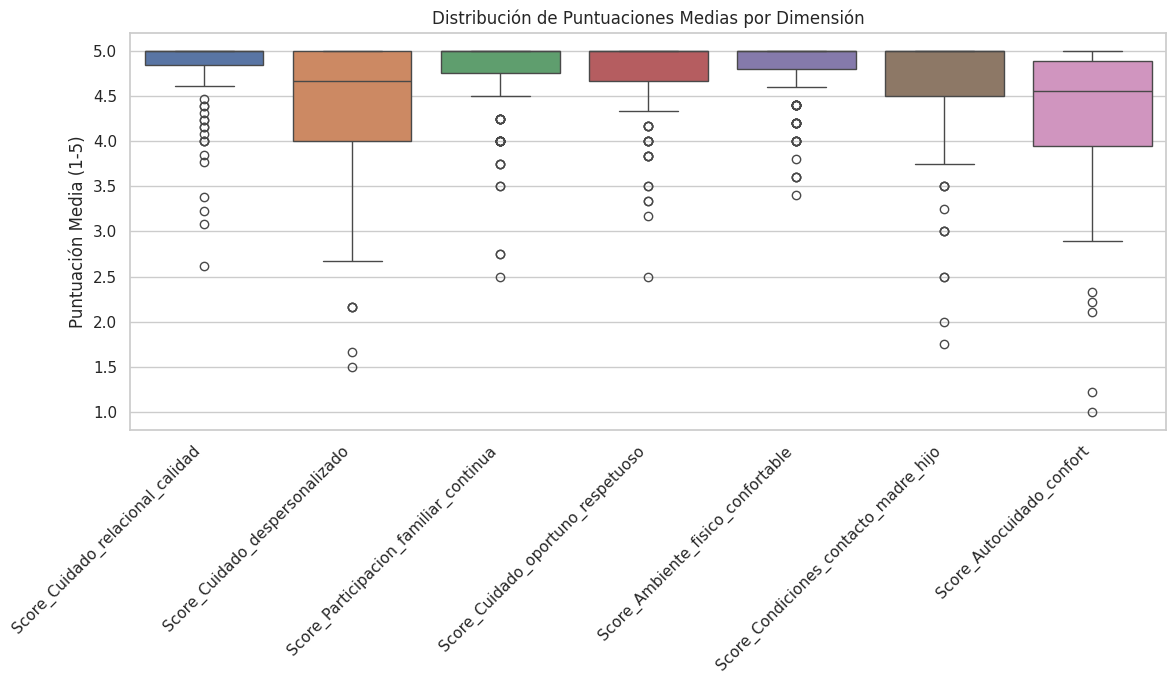

In [46]:
# Obtener resumen estadístico de las puntuaciones de dimensión
score_cols = [col for col in df.columns if col.startswith('Score_')]
print("\nResumen Descriptivo - Puntuaciones por Dimensión:")
# Use '50%' instead of 'median' to access the median values
print(df[score_cols].describe().T[['mean', '50%', 'std', 'min', 'max']].rename(columns={'50%': 'median'}))

# Visualizar distribuciones de las puntuaciones por dimensión (Boxplots son buenos)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[score_cols])
plt.title('Distribución de Puntuaciones Medias por Dimensión')
plt.ylabel('Puntuación Media (1-5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Análisis Inferencial / Correlacional

In [47]:
# Ejemplo para la dimensión 'Autocuidado_confort'
dim_a_comparar = 'Score_Autocuidado_confort'
grupo1 = df[df['Tipo_parto_std'] == 'Parto Vaginal'][dim_a_comparar].dropna()
grupo2 = df[df['Tipo_parto_std'] == 'Cesárea'][dim_a_comparar].dropna()

# 1. Normalidad (Shapiro-Wilk)
shapiro_g1 = stats.shapiro(grupo1)
shapiro_g2 = stats.shapiro(grupo2)
print(f"Shapiro-Wilk Test (Normalidad) - Parto Vaginal: {shapiro_g1}")
print(f"Shapiro-Wilk Test (Normalidad) - Cesárea: {shapiro_g2}")
# Si p-value > 0.05, asumimos normalidad.

# 2. Homogeneidad de varianzas (Levene)
levene_test = stats.levene(grupo1, grupo2)
print(f"Levene Test (Homogeneidad de Varianzas): {levene_test}")
# Si p-value > 0.05, asumimos homogeneidad.

Shapiro-Wilk Test (Normalidad) - Parto Vaginal: ShapiroResult(statistic=np.float64(0.7825723123515036), pvalue=np.float64(6.469316440196158e-11))
Shapiro-Wilk Test (Normalidad) - Cesárea: ShapiroResult(statistic=np.float64(0.9138810076358386), pvalue=np.float64(0.0002490516556274835))
Levene Test (Homogeneidad de Varianzas): LeveneResult(statistic=np.float64(11.582524212523264), pvalue=np.float64(0.0008367313287528845))


Prueba U de Mann-Whitney para Score_Autocuidado_confort: MannwhitneyuResult(statistic=np.float64(4458.0), pvalue=np.float64(8.881935418297646e-05))
Hay una diferencia estadísticamente significativa (p=0.000) en Score_Autocuidado_confort entre Parto Vaginal y Cesárea.


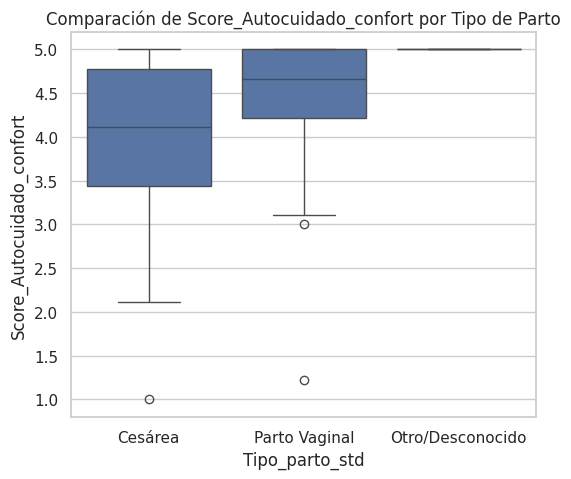

In [48]:
alpha = 0.05 # Nivel de significancia

# Decidir qué prueba usar basado en los supuestos
if shapiro_g1.pvalue > alpha and shapiro_g2.pvalue > alpha and levene_test.pvalue > alpha:
    # Usar t-test
    t_test_result = stats.ttest_ind(grupo1, grupo2, equal_var=True) # equal_var=True si Levene > alpha
    print(f"Prueba t de Student para {dim_a_comparar}: {t_test_result}")
    test_type = 't-test'
else:
    # Usar Mann-Whitney U
    mw_test_result = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney para {dim_a_comparar}: {mw_test_result}")
    test_type = 'Mann-Whitney U'

# Interpretación del p-valor
p_value = t_test_result.pvalue if test_type == 't-test' else mw_test_result.pvalue
if p_value < alpha:
    print(f"Hay una diferencia estadísticamente significativa (p={p_value:.3f}) en {dim_a_comparar} entre Parto Vaginal y Cesárea.")
else:
    print(f"No hay una diferencia estadísticamente significativa (p={p_value:.3f}) en {dim_a_comparar} entre Parto Vaginal y Cesárea.")

# Visualización comparativa
plt.figure(figsize=(6, 5))
sns.boxplot(x='Tipo_parto_std', y=dim_a_comparar, data=df)
plt.title(f'Comparación de {dim_a_comparar} por Tipo de Parto')
plt.show()


Prueba de Kruskal-Wallis para Score_Cuidado_relacional_calidad por Nivel Educacional: KruskalResult(statistic=np.float64(6.4265915319530595), pvalue=np.float64(0.16947487685889798))
No hay una diferencia estadísticamente significativa (p=0.169) en Score_Cuidado_relacional_calidad entre los niveles educacionales.


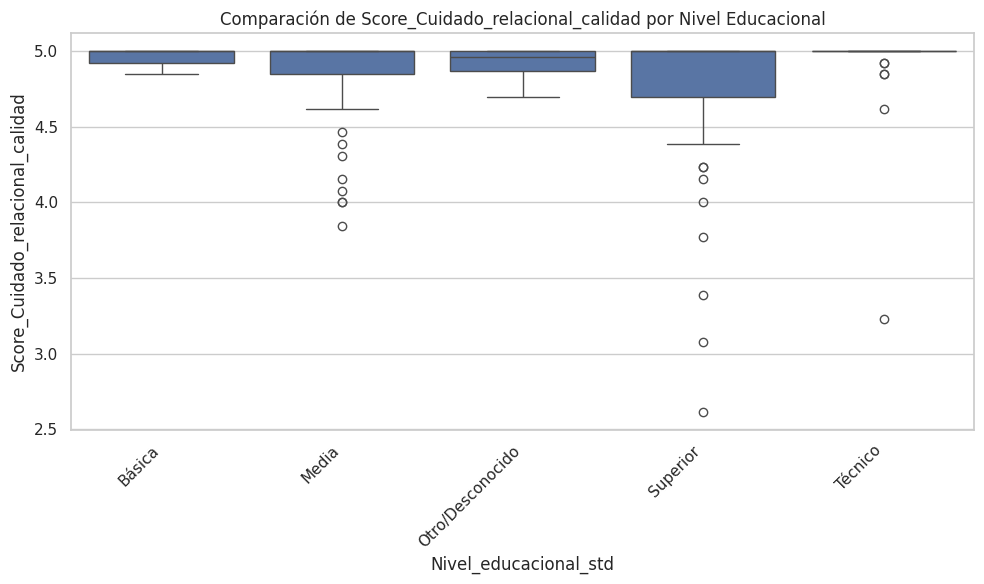

In [49]:
# Ejemplo para 'Score_Cuidado_relacional_calidad' por Nivel Educacional
dim_a_comparar_edu = 'Score_Cuidado_relacional_calidad'
niveles_edu = df['Nivel_educacional_std'].unique()
grupos_edu = [df[df['Nivel_educacional_std'] == nivel][dim_a_comparar_edu].dropna() for nivel in niveles_edu]

# Asumiendo que no se cumplen supuestos para ANOVA -> Kruskal-Wallis
kw_test_result = stats.kruskal(*grupos_edu)
print(f"\nPrueba de Kruskal-Wallis para {dim_a_comparar_edu} por Nivel Educacional: {kw_test_result}")

if kw_test_result.pvalue < alpha:
    print(f"Hay una diferencia estadísticamente significativa (p={kw_test_result.pvalue:.3f}) en {dim_a_comparar_edu} entre los niveles educacionales.")
    # Aquí podrías realizar pruebas post-hoc (ej. Dunn) para ver qué grupos difieren
else:
    print(f"No hay una diferencia estadísticamente significativa (p={kw_test_result.pvalue:.3f}) en {dim_a_comparar_edu} entre los niveles educacionales.")

# Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nivel_educacional_std', y=dim_a_comparar_edu, data=df, order=sorted(niveles_edu))
plt.title(f'Comparación de {dim_a_comparar_edu} por Nivel Educacional')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlación de Spearman entre Edad y Score_Ambiente_fisico_confortable: Coeficiente=0.032, p-valor=0.680
La correlación no es estadísticamente significativa.


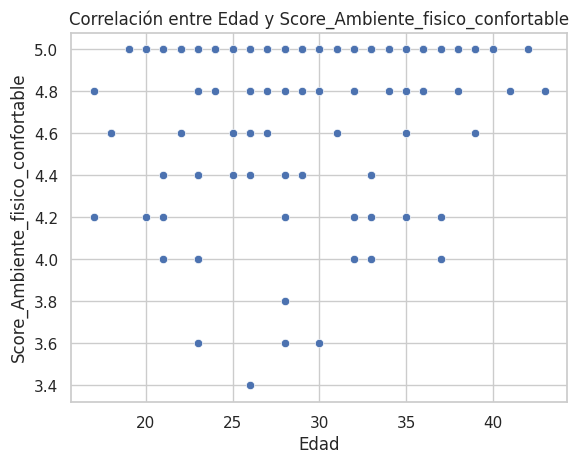

In [50]:
# Ejemplo para 'Score_Ambiente_fisico_confortable' y Edad
dim_a_correlacionar = 'Score_Ambiente_fisico_confortable'
edad_data = df['Edad'].dropna()
score_data = df[dim_a_correlacionar].dropna()

# Alineamos los datos (importante si hubo NaNs diferentes)
common_index = edad_data.index.intersection(score_data.index)
edad_data = edad_data.loc[common_index]
score_data = score_data.loc[common_index]

# Asumiendo no normalidad -> Spearman
spearman_corr, p_value_corr = stats.spearmanr(edad_data, score_data)
print(f"\nCorrelación de Spearman entre Edad y {dim_a_correlacionar}: Coeficiente={spearman_corr:.3f}, p-valor={p_value_corr:.3f}")

if p_value_corr < alpha:
    print("La correlación es estadísticamente significativa.")
else:
    print("La correlación no es estadísticamente significativa.")

# Visualización
sns.scatterplot(x=edad_data, y=score_data)
plt.title(f'Correlación entre Edad y {dim_a_correlacionar}')
plt.xlabel('Edad')
plt.ylabel(dim_a_correlacionar)
plt.show()